In [1]:
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

data_file_name = 'preprocessed.csv'
points = pd.read_csv(data_file_name)
print(len(points))


5820310


In [2]:
import warnings

warnings.filterwarnings(action='ignore') 

In [3]:
from sklearn.cluster import KMeans 

n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, max_iter=1000)
kmeans.fit(points.values)

# 결과 확인
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()
centers = kmeans.cluster_centers_

print(centers)

# sns.scatterplot(x="x", y="y", hue="cluster", data=result_by_sklearn, palette="Set2")

[[ 0.36029711  0.56865521  1.19502318  0.64457057  0.62097115  0.68885792
   0.33374392  0.74735582 -0.85335966  0.61591608 -0.27720505  0.87241904
  -0.15242397  0.2889567 ]
 [ 0.35998767  0.56807839  1.19479554  0.64439147  0.62166639  0.6892371
   0.33405429  0.74835566 -0.57842055 -0.651015    3.14376275  0.58515089
   1.40269916 -0.34731854]
 [ 0.35948479  0.56848909  1.19547491  0.64383631  0.62053242  0.68906324
   0.33387734  0.74745434  1.10753377 -1.44764397 -0.27720505 -1.11777718
  -0.08143645 -0.26479384]
 [ 0.35974197  0.56903573  1.19550099  0.64508535  0.62165393  0.68972689
   0.33362762  0.74832444  1.04816824  0.6568884  -0.27669158 -1.08940746
  -0.10412941 -0.2633939 ]]


In [4]:
from sklearn.cluster import KMeans 
from sklearn_extra.cluster import KMedoids

n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(points.values)

# 결과 확인
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()
centers = kmeans.cluster_centers_

print(centers)

[[ 3.58609530e-01  5.70548154e-01  1.19645786e+00  6.43308253e-01
   6.20484219e-01  6.84488360e-01  3.33109698e-01  7.48072058e-01
  -5.97698110e-01 -3.88030272e-01  2.57498363e+00  8.52880108e-01
   4.30396684e+00 -3.34937257e-01]
 [ 3.86721035e-04  2.02185422e-02  1.56249044e+00  7.14813357e-03
   8.19285823e-01  8.92961430e-01  3.70613767e-01  9.14658115e-01
  -8.49439287e-01  6.11708081e-01 -2.77205048e-01  8.27860820e-01
  -1.53127326e-01 -1.80689436e-01]
 [ 3.59559677e-01  5.68890579e-01  1.19545730e+00  6.44604051e-01
   6.22118852e-01  6.89566310e-01  3.33727791e-01  7.48502512e-01
   1.16773375e+00  6.56888404e-01 -2.77205048e-01 -1.10178096e+00
  -1.17268416e-01 -2.55621958e-01]
 [ 1.73479082e-01  5.25322289e-01  1.60718462e+00  3.34175674e-01
   4.58303157e-01  4.96803128e-01  2.77494563e-01  6.55764782e-01
   1.11445411e+00 -1.44742968e+00 -2.77205048e-01 -1.11846923e+00
  -8.35937648e-02 -2.75932200e-01]
 [ 3.44230209e-01  5.72555654e-01  1.21006647e+00  6.28147213e-01
  

In [5]:
label_dict = {
    0 : 0,
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9: 0  
}

for c in kmeans.labels_:
    label_dict[c]+=1

485


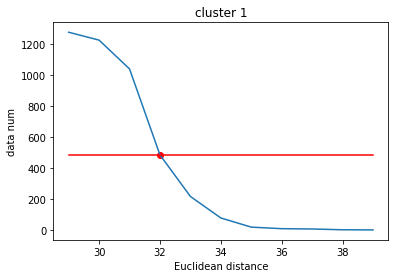

181329


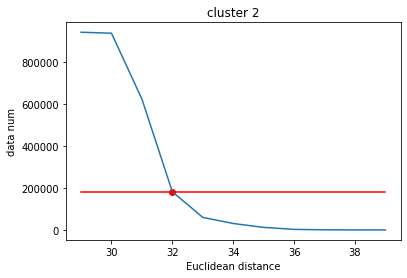

32282


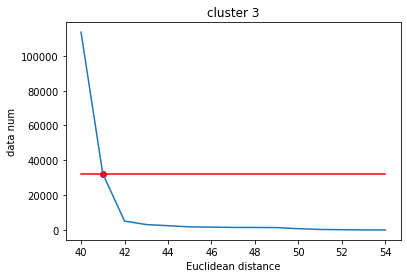

103341


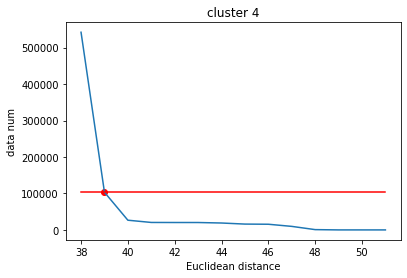

302


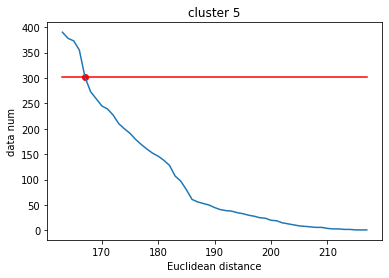

225386


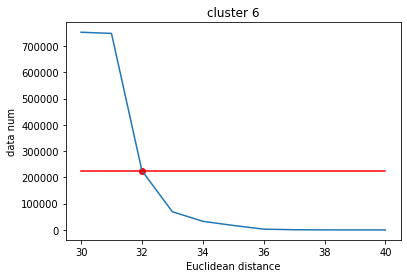

395953


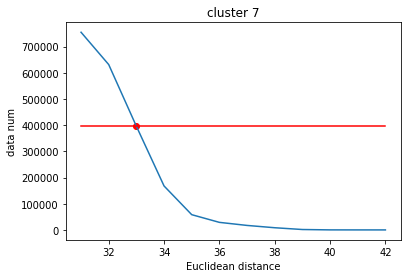

23


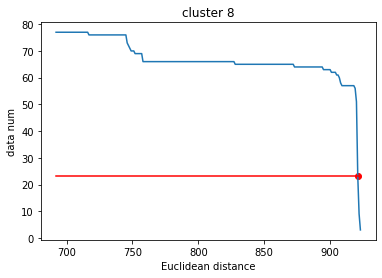

408


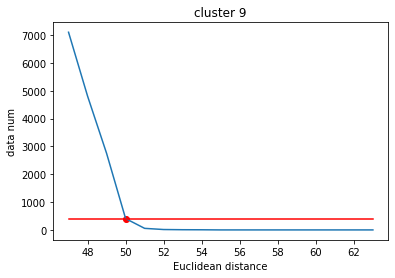

139


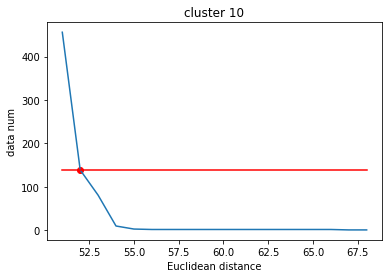

In [6]:
from scipy import spatial
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from matplotlib import pyplot as plt
threshold = 0.1

cluster_errors = {}
cluster_indics = {}

outliers = []
for i in range(len(centers)):
    
    cluster_errors[i] = []
    cluster_indics[i] = []
    cluster_result = points[result_by_sklearn['cluster'] == i]
    mse = (cluster_result - centers[0]) ** 2
    mse = mse.sum(axis=1)
    
    cluster_result['mse'] = mse
    
    arr = []
    x = [i for i in range(int(mse.max()*0.75), int(mse.max())+1)] # 설정하고자 하는 범위
    
    
    for j in range(int(mse.max()*0.75), int(mse.max())+1):
        arr.append(np.sum(np.array(mse > j)))

    before = np.concatenate((arr, [0]))
    after = np.concatenate(([0], arr))
    index = (np.argmax(after-before))
    threshold =index + int(mse.max()*0.75)
    
#     print("threshold: ", arr[index-1])
#     print("array : ", arr[index-1: index+2])
    
    
#     print(cluster_result[cluster_result['mse'] > threshold])
    print(len(cluster_result[cluster_result['mse'] > threshold]))
    plt.title("cluster " + str(i+1))
    plt.plot(x, arr)
    plt.plot(x, [arr[index] for _ in x], color = 'red')
#     plt.plot([threshold for i in range(min(arr), max(arr))], [i for i in range(min(arr), max(arr))], color = 'red')
#     print(arr[index], threshold)
    plt.scatter(threshold, arr[index], color='red')
    plt.xlabel("Euclidean distance")
    plt.ylabel("data num")
    plt.show()
    print("="*100)
    
    outliers += list(cluster_result[cluster_result['mse'] > threshold].index)

In [7]:
outliers = set(outliers)
is_outlier = []
for l in list(points.index):
    is_outlier.append(l in outliers)
    

In [8]:
answer = points
answer['outliers'] = is_outlier

In [ ]:
answer.to_csv("label.csv", mode='w')
